<a href="https://colab.research.google.com/github/Kusumathecoder/Vegetable-And-Fruit-Recognition/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import modules
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.layers import Input,Dense,LSTM,Embedding,Dropout,add

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt



 # Data preprocessing


##Training Image Processing

In [ ]:
vatraining_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Vegetable_and_fruits/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)




Found 3115 files belonging to 36 classes.


#Validation Image Preprocessing

In [ ]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Vegetable_and_fruits/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

)


Found 351 files belonging to 36 classes.


#Building Model


In [ ]:
cnn=tf.keras.models.Sequential()

#Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax')) #output layer

#compiling and training

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 26, 26, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       5,538,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 36)                  │           9,252 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,903,976 (22.52 MB)

 Trainable params: 5,903,976 (22.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=vatraining_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 667ms/step - accuracy: 0.0290 - loss: 3.5861 - val_accuracy: 0.0256 - val_loss: 3.5860
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 662ms/step - accuracy: 0.0340 - loss: 3.5851 - val_accuracy: 0.0285 - val_loss: 3.5859
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 62s 630ms/step - accuracy: 0.0219 - loss: 3.5843 - val_accuracy: 0.0285 - val_loss: 3.5852
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 640ms/step - accuracy: 0.0318 - loss: 3.5825 - val_accuracy: 0.0285 - val_loss: 3.5858
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 651ms/step - accuracy: 0.0284 - loss: 3.5835 - val_accuracy: 0.0285 - val_loss: 3.5850
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 656ms/step - accuracy: 0.0284 - loss: 3.5808 - val_accuracy: 0.0285 - val_loss: 3.5859
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 667ms/step - accuracy: 0.0282 - loss: 3.5797 - val_accuracy: 0.0256 - val_loss: 3.5856
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 655ms/step - accuracy: 0.0301 - loss: 3.5819 - val_accu

#Saving  model

In [ ]:
cnn.save('trained_model.h5')


#Recording Histroy


In [ ]:
training_history.history #  Return

{'accuracy': [0.026645265519618988,
  0.03274478390812874,
  0.026966292411088943,
  0.026966292411088943,
  0.026966292411088943,
  0.0272873193025589,
  0.02857142873108387,
  0.02857142873108387,
  0.03627608343958855,
  0.03178170323371887,
  0.03178170323371887,
  0.026966292411088943,
  0.03210273012518883,
  0.028892455622553825,
  0.030176565051078796,
  0.03467094525694847,
  0.03723916411399841,
  0.02921348251402378,
  0.0272873193025589,
  0.03178170323371887,
  0.02985553815960884,
  0.02792937308549881,
  0.03274478390812874,
  0.03402889147400856,
  0.03338683769106865,
  0.029534511268138885,
  0.028892455622553825,
  0.02921348251402378,
  0.02921348251402378,
  0.02985553815960884,
  0.03531300276517868,
  0.02985553815960884],
 'loss': [3.586259365081787,
  3.583526134490967,
  3.5861754417419434,
  3.5836546421051025,
  3.58297061920166,
  3.5810747146606445,
  3.580902338027954,
  3.5803616046905518,
  3.5788211822509766,
  3.5808582305908203,
  3.579101324081421,


In [ ]:
import json
with open('training_history.json', 'w') as f:
    json.dump(training_history.history, f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


#Calculating Accuracy of Model Achieved on Validation Set

In [ ]:
training_history.history['val_accuracy'][-1]*100

86.89458966255188

#Accuracy Visualization

Text(0.5, 1.0, 'visualization of training Accuracy Result')

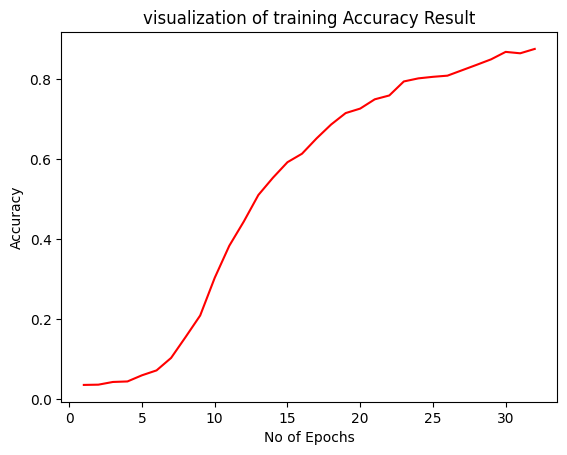

In [ ]:
epoche = range(1, len(training_history.history['accuracy']) + 1)

# Plot accuracy
plt.plot(epoche, training_history.history['accuracy'], color="red")
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.title("visualization of training Accuracy Result")

In [ ]:
epoche

range(1, 33)

Text(0.5, 1.0, 'visualization of validation Accuracy Result')

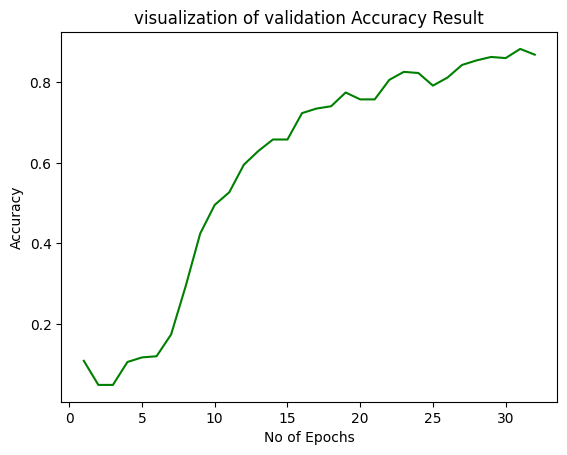

In [ ]:
plt.plot(epoche,training_history.history['val_accuracy'],color="green")
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.title("visualization of validation Accuracy Result")